In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_customers = pd.read_csv('customer_churn_dataset-training-master.csv')
df_customers

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [3]:
df_customers.shape
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


Remove the non-data rows

In [52]:
df_customers.dropna(inplace=True)
df_customers.shape
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  int64  
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  int64  
 8   Contract Length    440832 non-null  int64  
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 43.7 MB


Tenure data for Customers

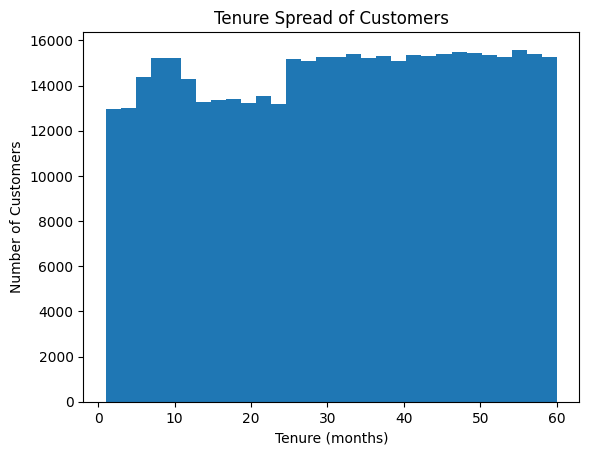

In [5]:
tenure_data = df_customers['Tenure']
tenure_data.describe()
plt.hist(tenure_data, bins=30)
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.title('Tenure Spread of Customers')
plt.show()

Unique values in each column

In [6]:
# figure out each column's unique values
for col in df_customers.columns:
    print(col, df_customers[col].unique())

CustomerID [2.00000e+00 3.00000e+00 4.00000e+00 ... 4.49997e+05 4.49998e+05
 4.49999e+05]
Age [30. 65. 55. 58. 23. 51. 39. 64. 29. 52. 22. 48. 24. 49. 19. 47. 42. 57.
 27. 59. 21. 60. 35. 18. 56. 20. 63. 25. 28. 32. 38. 37. 31. 53. 41. 33.
 26. 36. 44. 34. 61. 40. 45. 46. 54. 43. 50. 62.]
Gender ['Female' 'Male']
Tenure [39. 49. 14. 38. 32. 33. 37. 12.  3. 18. 21. 41. 35.  4. 56. 44. 15. 55.
 43. 52. 26.  2. 29. 59. 40. 51. 53. 24. 30.  6. 28. 17. 60.  7. 34. 10.
  5. 45. 54. 58. 25. 13. 47. 31. 22. 19. 23.  1.  8. 46. 16. 50. 48. 11.
 42. 27.  9. 20. 57. 36.]
Usage Frequency [14.  1.  4. 21. 20. 25. 12.  8.  5.  9.  6. 17. 23. 13. 16. 27.  2. 28.
 29. 15. 24.  3. 22. 26. 30.  7. 11. 18. 19. 10.]
Support Calls [ 5. 10.  6.  7.  9.  3.  4.  2.  0.  1.  8.]
Payment Delay [18.  8.  7. 26. 16. 15.  4. 11. 30. 25. 13. 22.  5. 14.  3. 10. 28.  2.
  6. 27. 12. 29. 17. 24.  9. 23. 21.  1.  0. 20. 19.]
Subscription Type ['Standard' 'Basic' 'Premium']
Contract Length ['Annual' 'Monthly' 'Quarter

Change non-numeric to numeric data
Gender: Female => 0 Male => 1
Subscription: Standard => 0 Baisc => 1 Premium => 2
Contract Length: Annual => 2 Monthly => 0 Quarterly => 1

In [7]:
gender_mapping = {'Female': 0, 'Male': 1}
subscription_mapping = {'Standard': 0, 'Basic': 1, 'Premium': 2}
contract_length_mapping = {'Annual': 2, 'Monthly': 0, 'Quarterly': 1}

df_customers['Gender'] = df_customers['Gender'].map(gender_mapping)
df_customers['Subscription Type'] = df_customers['Subscription Type'].map(subscription_mapping)
df_customers['Contract Length'] = df_customers['Contract Length'].map(contract_length_mapping)

New unique values in each column

In [8]:
for col in df_customers.columns:
    df_col = df_customers[col].unique()
    df_col.sort()
    print(col, df_col)

CustomerID [2.00000e+00 3.00000e+00 4.00000e+00 ... 4.49997e+05 4.49998e+05
 4.49999e+05]
Age [18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65.]
Gender [0 1]
Tenure [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60.]
Usage Frequency [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
Support Calls [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Payment Delay [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
Subscription Type [0 1 2]
Contract Length [0 1 2]
Total Spend [ 100.    100.02  100.06 ...  999.98  999.9

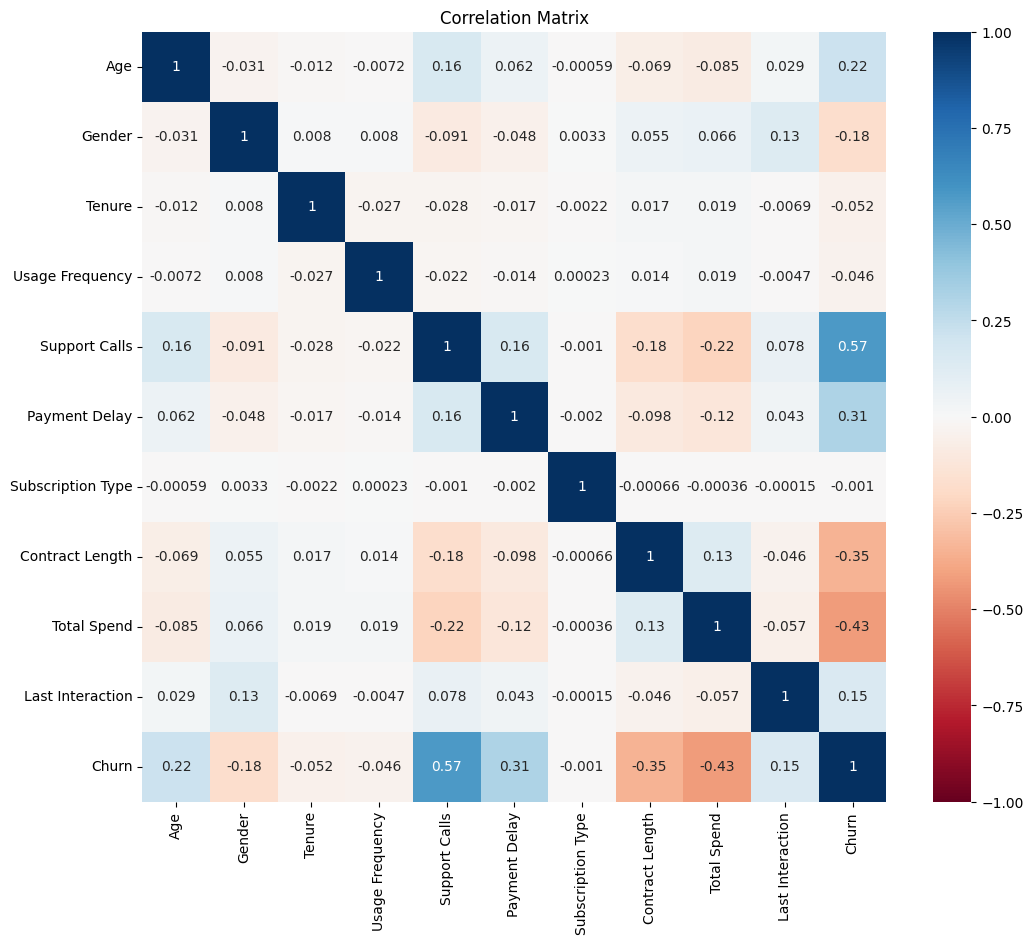

In [9]:
# Drop Customer ID column for correlation matrix
corr_matrix = df_customers.drop(['CustomerID'], axis=1).corr()

plt.figure(figsize=(12, 10))
s = sns.heatmap(corr_matrix,
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
s.set_yticklabels(s.get_yticklabels(), rotation=0)
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Show colomn features
col_features = df_customers[['Age','Gender','Tenure', 'Usage Frequency','Support Calls','Payment Delay','Subscription Type','Contract Length','Total Spend','Last Interaction','Churn']]
col_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,440832.0,39.373153,12.442369,18.0,29.0,39.0,48.0,65.0
Gender,440832.0,0.567681,0.495399,0.0,0.0,1.0,1.0,1.0
Tenure,440832.0,31.256336,17.255727,1.0,16.0,32.0,46.0,60.0
Usage Frequency,440832.0,15.807494,8.586242,1.0,9.0,16.0,23.0,30.0
Support Calls,440832.0,3.604437,3.070218,0.0,1.0,3.0,6.0,10.0
Payment Delay,440832.0,12.965722,8.258063,0.0,6.0,12.0,19.0,30.0
Subscription Type,440832.0,0.998979,0.821921,0.0,0.0,1.0,2.0,2.0
Contract Length,440832.0,1.204373,0.746851,0.0,1.0,1.0,2.0,2.0
Total Spend,440832.0,631.616223,240.803001,100.0,480.0,661.0,830.0,1000.0
Last Interaction,440832.0,14.480868,8.596208,1.0,7.0,14.0,22.0,30.0


In [11]:
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
customers_std = scaler.fit_transform(col_features)
customers_std[:5]
print('Original dataframe:\t', col_features.shape)
print('Standardized dataframe: ', customers_std.shape)
df_customers_std = pd.DataFrame(customers_std, columns=col_features.columns)
df_customers_std.head()

Original dataframe:	 (440832, 11)
Standardized dataframe:  (440832, 11)


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,-0.753326,-1.145909,0.448760,-0.210511,0.454549,0.609620,-1.215421,1.065311,1.247427,0.293052,0.87369
1,2.059646,-1.145909,1.028278,-1.724562,2.083100,-0.601319,0.001242,-1.612604,-0.309865,-0.986584,0.87369
2,1.255940,-1.145909,-1.000036,-1.375166,0.780259,0.609620,0.001242,-0.273646,-1.854698,-1.335575,0.87369
3,1.497051,0.872670,0.390808,0.604748,1.105969,-0.722413,-1.215421,-1.612604,-0.978462,1.689018,0.87369
4,-1.315921,0.872670,0.043097,0.488282,0.454549,-0.601319,0.001242,-1.612604,-0.060698,0.642043,0.87369


Data Exploration

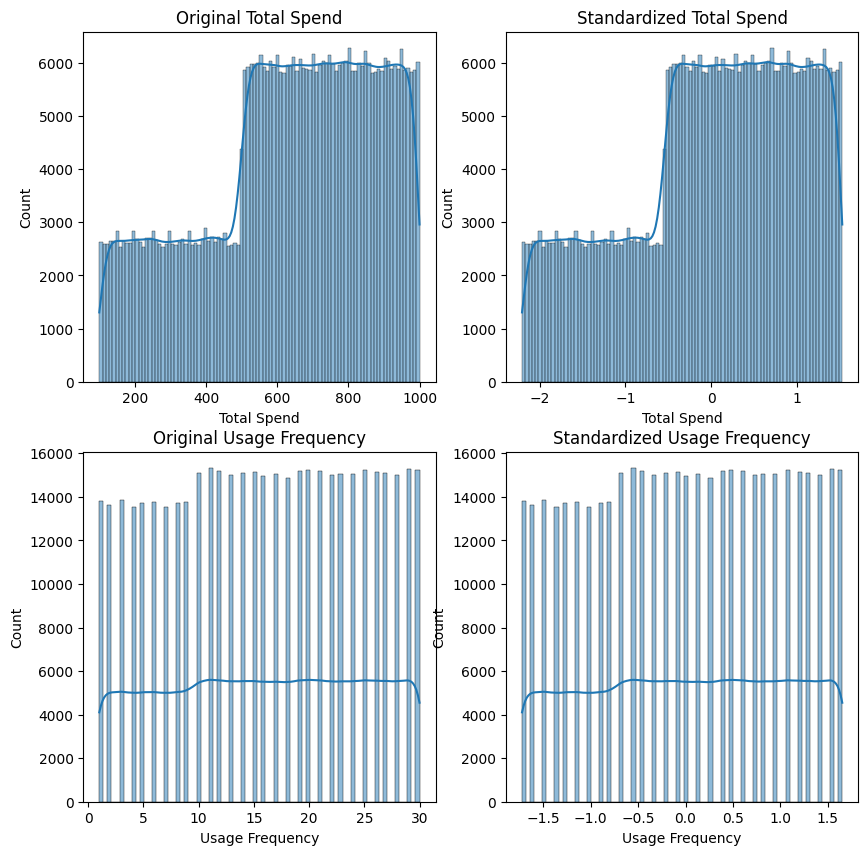

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(data=col_features, x='Total Spend', kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Original Total Spend')
sns.histplot(data=df_customers_std, x='Total Spend', kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Standardized Total Spend')
sns.histplot(data=col_features, x='Usage Frequency', kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Original Usage Frequency')
sns.histplot(data=df_customers_std, x='Usage Frequency', kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Standardized Usage Frequency')

plt.show()

In [13]:
print('Original DF mean:', col_features['Total Spend'].mean(axis=0))
print('Standardized DF mean:', df_customers_std['Total Spend'].mean(axis=0))
print('Original DF std:', col_features['Total Spend'].std(axis=0))
print('Standardized DF std:', df_customers_std['Total Spend'].std(axis=0))

Original DF mean: 631.6162227787459
Standardized DF mean: -8.304107176058081e-16
Original DF std: 240.80300112056855
Standardized DF std: 1.0000011342208612


K Means Clustering

Elbow Method

In [14]:
scaler = StandardScaler()
selected_cols = ['Age','Tenure','Usage Frequency','Support Calls','Payment Delay','Total Spend','Last Interaction']
df_copy = df_customers.copy()
df_selected = df_copy[selected_cols]
df_selected_scaled = scaler.fit_transform(df_selected)
df_selected_scaled = pd.DataFrame(df_selected_scaled, columns=selected_cols)
df_selected_scaled.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
0,-0.753326,0.448760,-0.210511,0.454549,0.609620,1.247427,0.293052
1,2.059646,1.028278,-1.724562,2.083100,-0.601319,-0.309865,-0.986584
2,1.255940,-1.000036,-1.375166,0.780259,0.609620,-1.854698,-1.335575
3,1.497051,0.390808,0.604748,1.105969,-0.722413,-0.978462,1.689018
4,-1.315921,0.043097,0.488282,0.454549,-0.601319,-0.060698,0.642043


In [15]:
from sklearn.cluster import KMeans

results = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=123)
    km.fit(df_selected_scaled)
    results.append([i, km.inertia_])
    

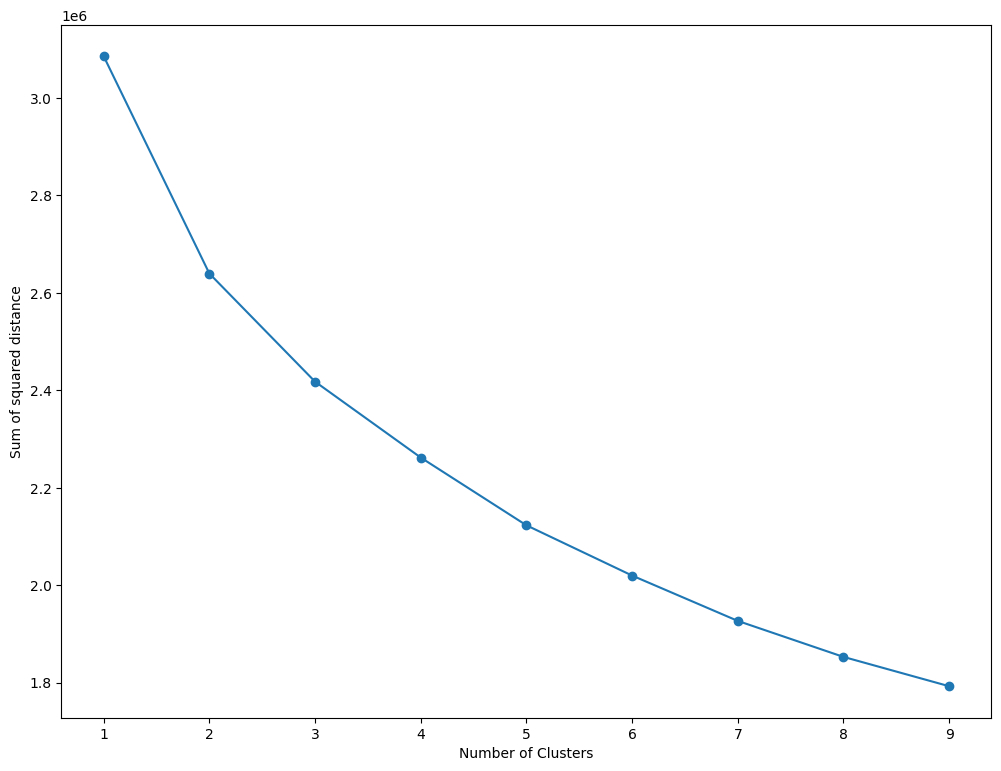

In [16]:
plt.figure(figsize=(12, 9))
plt.plot(pd.DataFrame(results)[0], pd.DataFrame(results)[1], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance')
plt.show()

Elbow point is at:  3


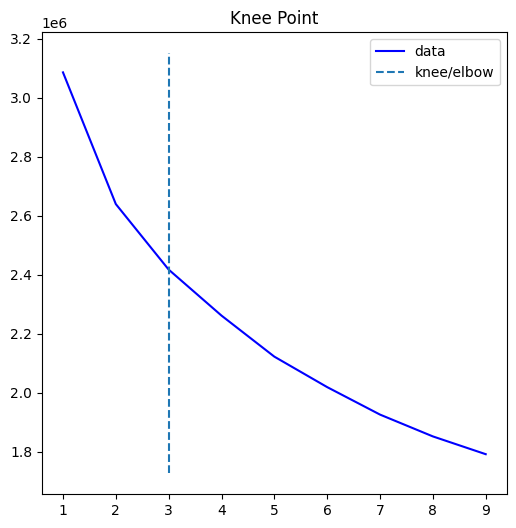

In [17]:
from kneed import KneeLocator
# Find elbow point
kneed = KneeLocator(pd.DataFrame(results)[0], pd.DataFrame(results)[1], curve='convex', direction='decreasing', online=True)
kneed.plot_knee()
kneed_elbow = kneed.elbow
print('Elbow point is at: ', kneed_elbow)

K-Means choose 3 clusters

In [18]:
km = KMeans(n_clusters=kneed_elbow, init='k-means++', n_init=10, random_state=42)
km.fit(df_selected_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [19]:
df_customers_kmeans = df_customers.copy()
df_customers_kmeans['Cluster'] = km.labels_
df_customers_kmeans['Cluster'] = df_customers_kmeans['Cluster'].apply(lambda x: x+1)
df_customers_kmeans.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Cluster
0,2.0,30.0,0,39.0,14.0,5.0,18.0,0,2,932.0,17.0,1.0,1
1,3.0,65.0,0,49.0,1.0,10.0,8.0,1,0,557.0,6.0,1.0,3
2,4.0,55.0,0,14.0,4.0,6.0,18.0,1,1,185.0,3.0,1.0,3
3,5.0,58.0,1,38.0,21.0,7.0,7.0,0,0,396.0,29.0,1.0,3
4,6.0,23.0,1,32.0,20.0,5.0,8.0,1,0,617.0,20.0,1.0,2


Analysis

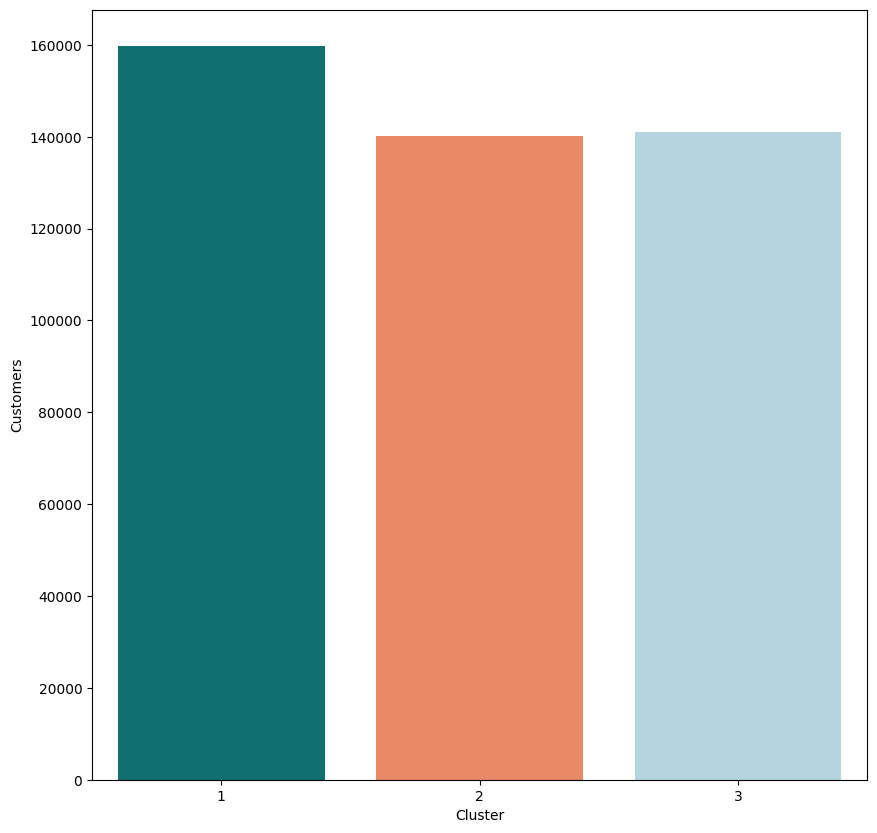

In [20]:
need_col = ['Age','Tenure','Usage Frequency','Support Calls','Payment Delay','Total Spend','Last Interaction','Cluster']
df_customers_kmeans_selected = df_customers_kmeans[need_col]
plt.figure(figsize=(10, 10))
s = sns.countplot(
    data=df_customers_kmeans_selected,
    x='Cluster',
    palette=['teal','coral','lightblue']
)
plt.xlabel('Cluster')
plt.ylabel('Customers')
plt.savefig('countplot.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

In [21]:
df_customers_analysis = df_customers_kmeans_selected.groupby('Cluster').mean()
df_customers_analysis

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
Cluster,,,,,,,
1,36.746407,45.658118,14.253468,2.132727,10.714136,719.870708,13.504230
2,37.118285,15.420134,18.278688,2.294828,10.970953,713.461492,13.667735
3,44.589313,30.687535,15.111051,6.572916,17.498468,450.312768,16.395176


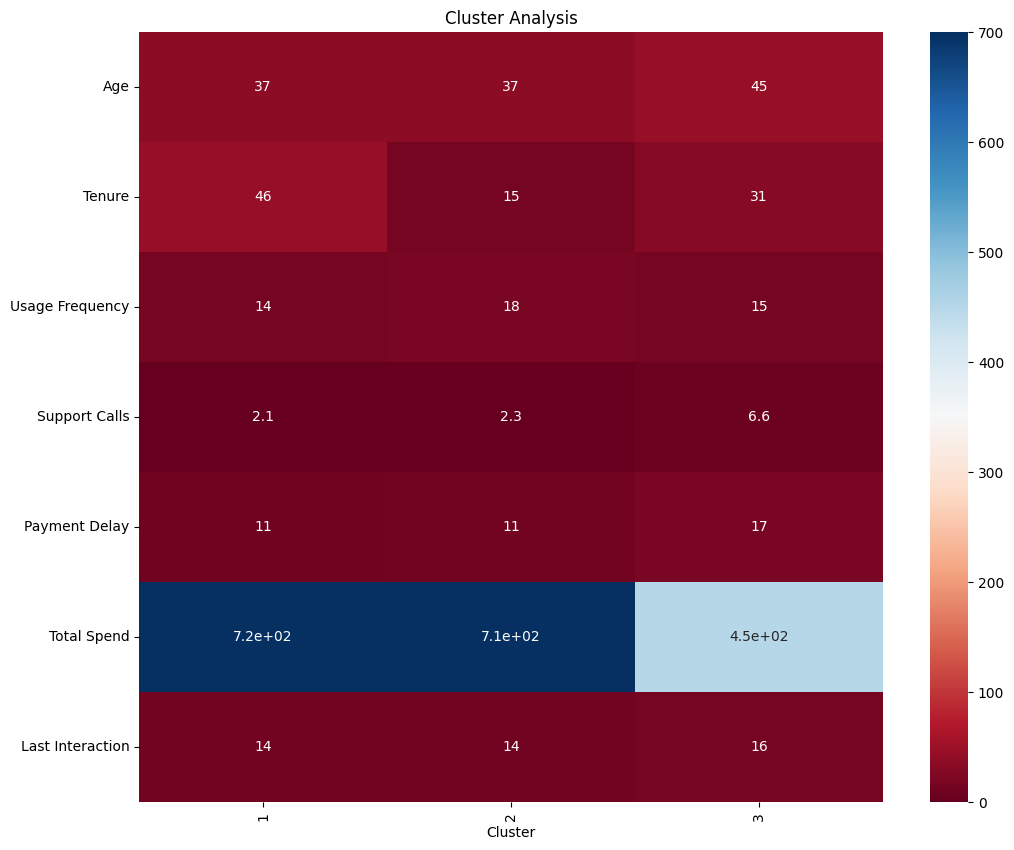

In [22]:
# Heatmap with cluster means
plt.figure(figsize=(12, 10))
s = sns.heatmap(df_customers_analysis.transpose(),
                annot=True,
                cmap='RdBu',
                vmin=0,
                vmax=700)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
s.set_yticklabels(s.get_yticklabels(), rotation=0)
plt.title('Cluster Analysis')
plt.savefig('heatmap.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

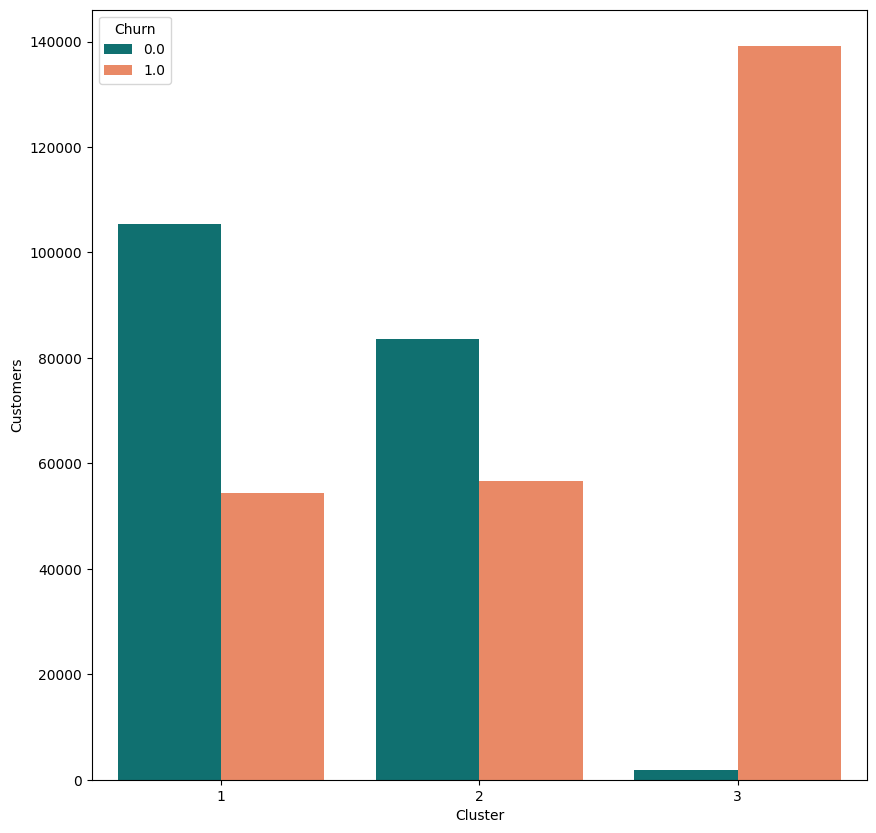

In [23]:
# Customer Churn for each cluster
plt.figure(figsize=(10, 10))
s = sns.countplot(
    data=df_customers_kmeans,
    x='Cluster',
    hue='Churn',
    palette=['teal','coral']
)
plt.xlabel('Cluster')
plt.ylabel('Customers')
plt.savefig('countplot_churn.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

Shows that customers in cluster 3 are more likely to churn

In [24]:
df_customers_kmeans[df_customers_kmeans['Cluster'] == 3].median()

CustomerID           132427.0
Age                      46.0
Gender                    1.0
Tenure                   31.0
Usage Frequency          15.0
Support Calls             7.0
Payment Delay            19.0
Subscription Type         1.0
Contract Length           1.0
Total Spend             417.0
Last Interaction         17.0
Churn                     1.0
Cluster                   3.0
dtype: float64

In [25]:
median_comparison = df_customers_kmeans.groupby('Cluster').median()
median_comparison

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
Cluster,,,,,,,,,,,,
1,303381.0,37.0,1.0,46.0,14.0,2.0,10.0,1.0,1.0,738.39,12.0,0.0
2,287811.0,37.0,1.0,14.0,19.0,2.0,10.0,1.0,1.0,734.88,13.0,0.0
3,132427.0,46.0,1.0,31.0,15.0,7.0,19.0,1.0,1.0,417.00,17.0,1.0


In [26]:
average_comparison = df_customers_kmeans.groupby('Cluster').mean()
average_comparison

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
Cluster,,,,,,,,,,,,
1,275033.643846,36.746407,0.601681,45.658118,14.253468,2.132727,10.714136,0.998597,1.310187,719.870708,13.504230,0.340291
2,261265.578318,37.118285,0.592745,15.420134,18.278688,2.294828,10.970953,1.003275,1.281086,713.461492,13.667735,0.403716
3,133534.828232,44.589313,0.504262,30.687535,15.111051,6.572916,17.498468,0.995142,1.008284,450.312768,16.395176,0.986390


Prediction

In [27]:
df_process = df_customers_kmeans.copy()
df_process = df_process.drop(['CustomerID', 'Cluster'], axis=1)
df_process.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,0,2,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,1,0,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,1,1,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,0,0,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,1,0,617.0,20.0,1.0


In [28]:
X = df_process.iloc[:, :-1]
Y = df_process.iloc[:, -1]

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [30]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_train shape: ', Y_train.shape)
print('Y_test shape: ', Y_test.shape)

X_train shape:  (352665, 10)
X_test shape:  (88167, 10)
Y_train shape:  (352665,)
Y_test shape:  (88167,)


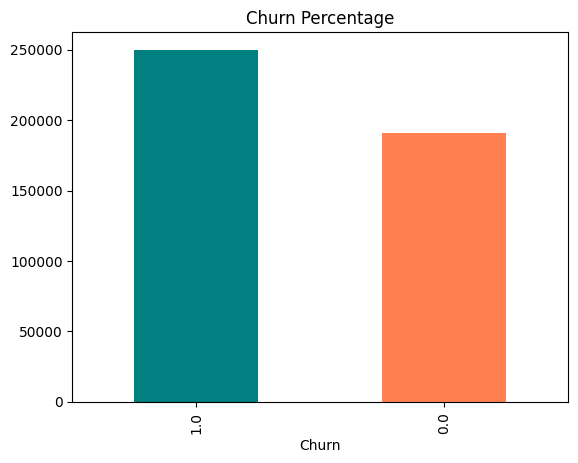

In [31]:
df_process.Churn.value_counts().plot(kind='bar', color=['teal','coral'])
plt.title('Churn Percentage')
plt.savefig('churn_percentage.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

Imbalance Data for churn, need oversampling

X_train shape:  (399790, 10)
Y_train shape:  (399790,)


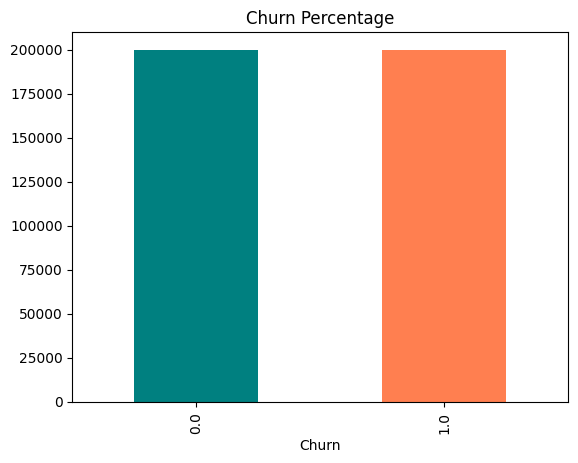

In [32]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='minority')
X_train_ros, Y_train_ros = ros.fit_resample(X_train, Y_train)

print('X_train shape: ', X_train_ros.shape)
print('Y_train shape: ', Y_train_ros.shape)
# show the class distribution after oversampling
pd.Series(Y_train_ros).value_counts().plot(kind='bar', color=['teal','coral'])
plt.title('Churn Percentage')
plt.savefig('churn_percentage_oversampling.png', bbox_inches='tight', pad_inches=0.5)
plt.show()


In [33]:
print('Original dataset shape: ', Y_train.value_counts())
print('Resampled dataset shape: ', Y_train_ros.value_counts())

Original dataset shape:  Churn
1.0    199895
0.0    152770
Name: count, dtype: int64
Resampled dataset shape:  Churn
0.0    199895
1.0    199895
Name: count, dtype: int64


In [34]:
# Visualize the feature importance in descending order
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_ros, Y_train_ros)

feature_importance = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)
feature_importance

,Importance
Support Calls,0.301050
Total Spend,0.224560
Contract Length,0.141182
Age,0.128786
Payment Delay,0.124840
Last Interaction,0.034225
Gender,0.033715
Tenure,0.007283
Usage Frequency,0.002723
Subscription Type,0.001635


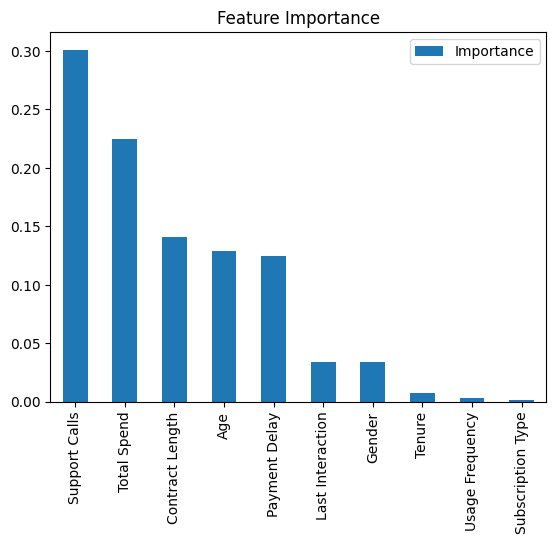

In [35]:
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.savefig('feature_importance.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

Decide to use first 7 columns to predict churn

In [36]:
X_train_selected = X_train_ros[['Support Calls', 'Total Spend', 'Contract Length', 'Age', 'Payment Delay', 'Last Interaction', 'Gender']]
X_train_selected.head()

,Support Calls,Total Spend,Contract Length,Age,Payment Delay,Last Interaction,Gender
0,0.0,665.22,2,24.0,4.0,29.0,1
1,1.0,754.00,1,24.0,26.0,12.0,1
2,0.0,852.86,1,18.0,7.0,9.0,1
3,2.0,758.00,0,36.0,23.0,3.0,0
4,8.0,688.00,0,57.0,15.0,10.0,0


In [37]:
Y_train_selected = Y_train_ros
print('X_train shape: ', X_train_selected.shape)
print('Y_train shape: ', Y_train_selected.shape)

X_train shape:  (399790, 7)
Y_train shape:  (399790,)


Selecte Model

Scale the data

In [38]:
from sklearn.preprocessing import StandardScaler
X_test = X_test[['Support Calls','Total Spend', 'Contract Length', 'Age', 'Payment Delay', 'Last Interaction', 'Gender']]
scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train_selected)
X_test = scaler.transform(X_test)

Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

start_time = time.time()
model = LogisticRegression()
model.fit(X_train_selected, Y_train_selected)

y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, y_pred))
print('Classification Report: \n', classification_report(Y_test, y_pred))
print('Time taken: ', time.time() - start_time)

Accuracy:  0.8700874476845079
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.82      0.90      0.86     38063
         1.0       0.91      0.85      0.88     50104

    accuracy                           0.87     88167
   macro avg       0.87      0.87      0.87     88167
weighted avg       0.87      0.87      0.87     88167

Time taken:  0.3170015811920166


Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

start_time = time.time()
model = DecisionTreeClassifier()
model.fit(X_train_selected, Y_train_selected)

y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, y_pred))
print('Classification Report: \n', classification_report(Y_test, y_pred))
print('Time cost: ', time.time() - start_time)

Accuracy:  0.9940907595812493
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     38063
         1.0       0.99      1.00      0.99     50104

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167

Time cost:  1.269829273223877


Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
model = RandomForestClassifier()
model.fit(X_train_selected, Y_train_selected)

y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, y_pred))
print('Classification Report: \n', classification_report(Y_test, y_pred))
print('Time cost: ', time.time() - start_time)

Accuracy:  0.9974253405469167
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     38063
         1.0       1.00      1.00      1.00     50104

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167

Time cost:  30.709083557128906


Neural Network

In [42]:
from sklearn.neural_network import MLPClassifier

start_time = time.time()
model = MLPClassifier()
model.fit(X_train_selected, Y_train_selected)

y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, y_pred))
print('Classification Report: \n', classification_report(Y_test, y_pred))
print('Time cost: ', time.time() - start_time)

Accuracy:  0.9972325246407386
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     38063
         1.0       1.00      1.00      1.00     50104

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167

Time cost:  35.29682731628418


Base on the accuracy and the run time, we choose the decision tree model

In [43]:
model = DecisionTreeClassifier()
model.fit(X_train_selected, Y_train_selected)

y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, y_pred))
print('Classification Report: \n', classification_report(Y_test, y_pred))

Accuracy:  0.9940794174691211
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     38063
         1.0       0.99      1.00      0.99     50104

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



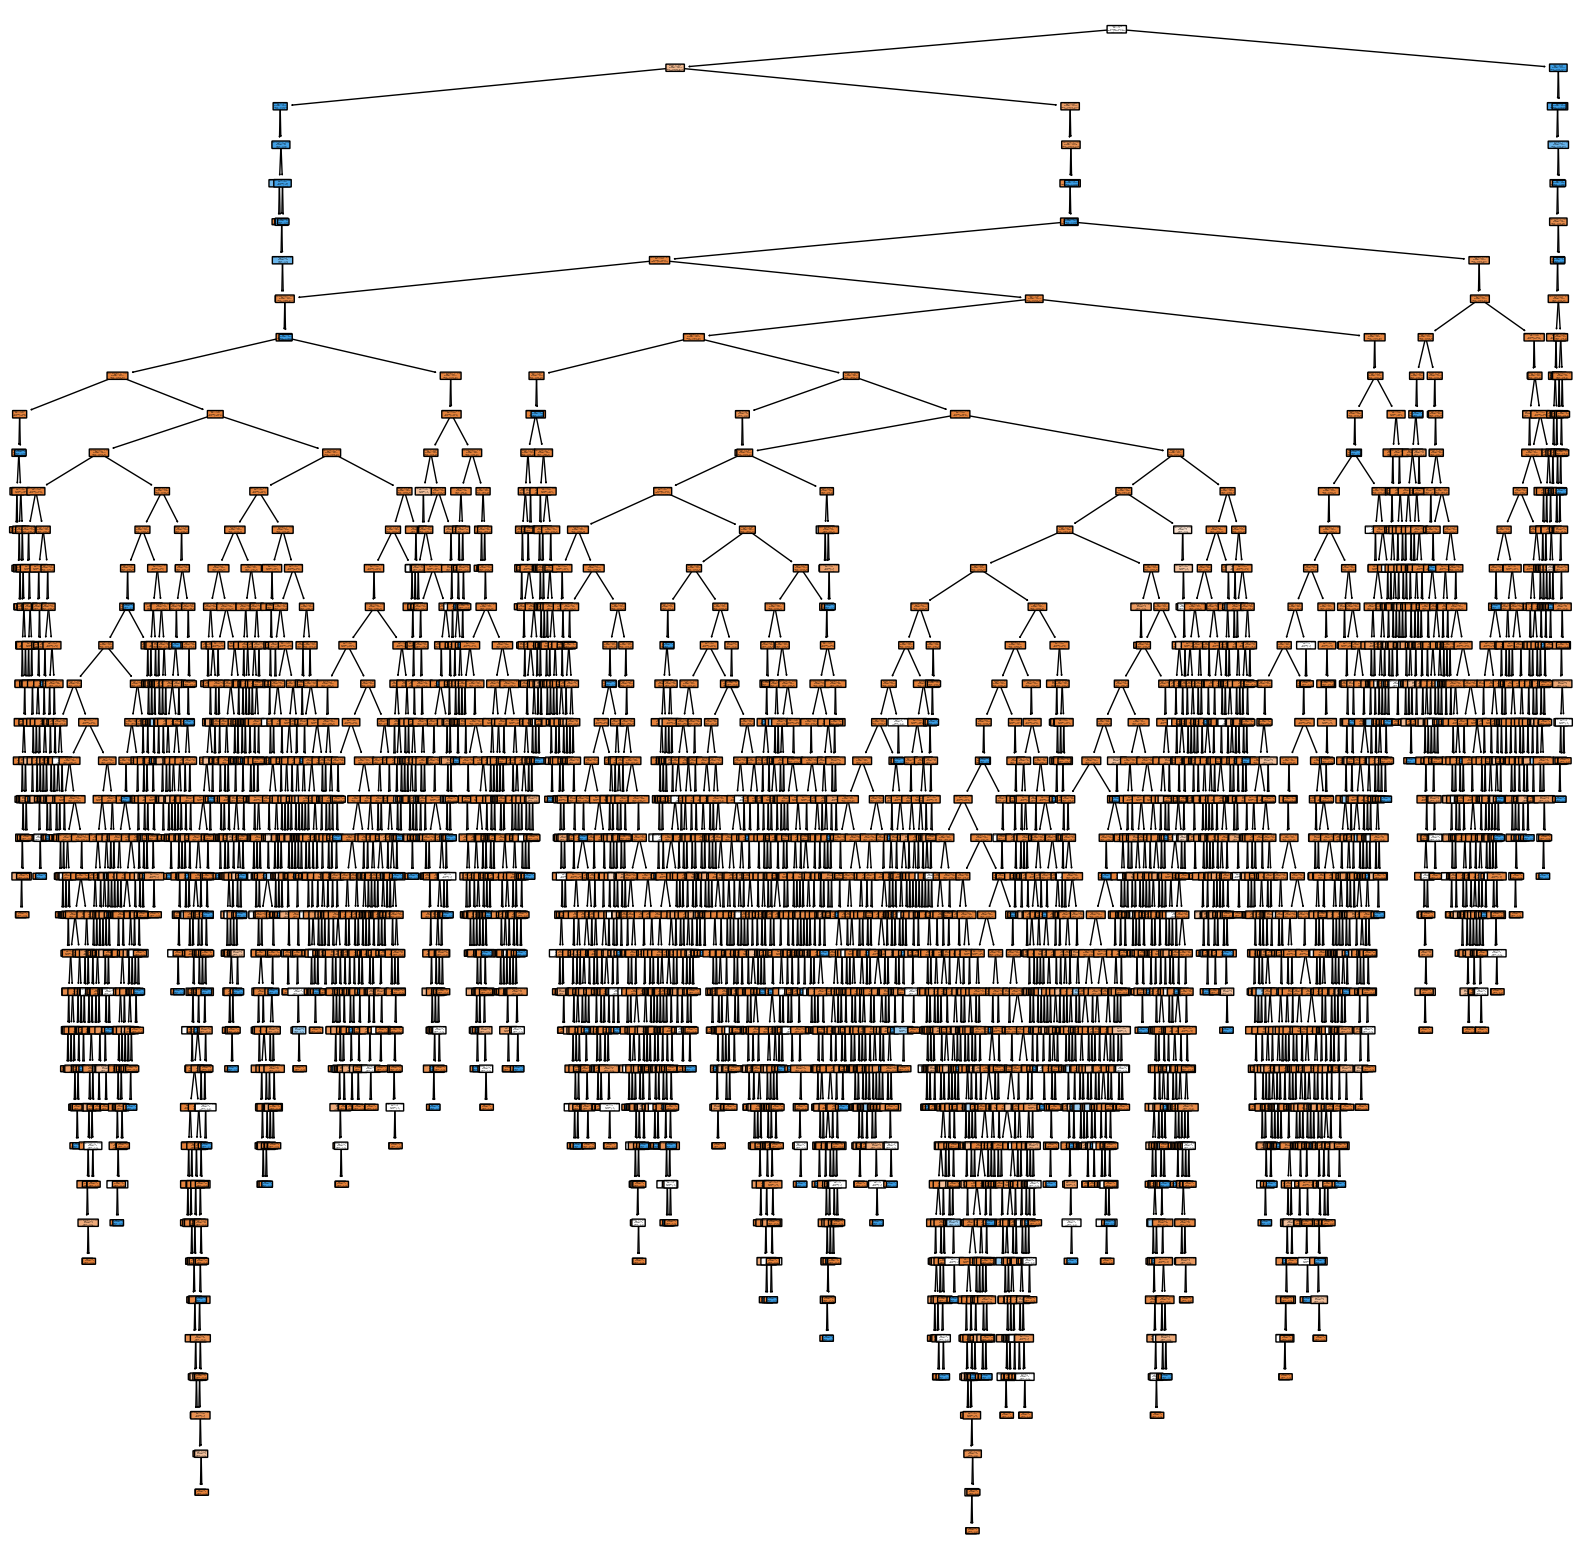

In [44]:
from sklearn import tree
plt.figure(figsize=(20, 20))
tree.plot_tree(model, filled=True, rounded=True, class_names=['No Churn', 'Churn'], feature_names=X_train.columns)
plt.savefig('decision_tree.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

Make the decision tree model readable

In [45]:
# make a loop to find the best max_depth and max_leaf_nodes

max_depths = np.linspace(1, 32, 32, endpoint=True)
max_leaf_nodes = np.linspace(2, 32, 31, endpoint=True)
results = []
for max_depth in max_depths:
    for max_leaf_node in max_leaf_nodes:
        model = DecisionTreeClassifier(max_depth=int(max_depth), max_leaf_nodes=int(max_leaf_node))
        model.fit(X_train_selected, Y_train_selected)
        y_pred = model.predict(X_test)
        results.append([max_depth, max_leaf_node, accuracy_score(Y_test, y_pred)])

results = pd.DataFrame(results, columns=['max_depth', 'max_leaf_node', 'accuracy'])
results.sort_values('accuracy', ascending=False).head(10)

,max_depth,max_leaf_node,accuracy
991,32.0,32.0,0.997425
739,24.0,28.0,0.997425
461,15.0,29.0,0.997425
462,15.0,30.0,0.997425
743,24.0,32.0,0.997425
742,24.0,31.0,0.997425
741,24.0,30.0,0.997425
740,24.0,29.0,0.997425
463,15.0,31.0,0.997425
433,14.0,32.0,0.997425


In [46]:
results.sort_values('accuracy', ascending=False)

,max_depth,max_leaf_node,accuracy
991,32.0,32.0,0.997425
739,24.0,28.0,0.997425
461,15.0,29.0,0.997425
462,15.0,30.0,0.997425
743,24.0,32.0,0.997425
...,...,...,...
186,7.0,2.0,0.753320
155,6.0,2.0,0.753320
124,5.0,2.0,0.753320
93,4.0,2.0,0.753320


In [47]:
filtered_results = results[results['accuracy'] > 0.997425]
filtered_results

,max_depth,max_leaf_node,accuracy
336,11.0,28.0,0.997425
337,11.0,29.0,0.997425
338,11.0,30.0,0.997425
339,11.0,31.0,0.997425
340,11.0,32.0,0.997425
...,...,...,...
987,32.0,28.0,0.997425
988,32.0,29.0,0.997425
989,32.0,30.0,0.997425
990,32.0,31.0,0.997425


In [48]:
sorted_results = filtered_results.sort_values(by=['max_depth', 'max_leaf_node'])
sorted_results

,max_depth,max_leaf_node,accuracy
336,11.0,28.0,0.997425
337,11.0,29.0,0.997425
338,11.0,30.0,0.997425
339,11.0,31.0,0.997425
340,11.0,32.0,0.997425
...,...,...,...
987,32.0,28.0,0.997425
988,32.0,29.0,0.997425
989,32.0,30.0,0.997425
990,32.0,31.0,0.997425


In [49]:
model = DecisionTreeClassifier(max_depth=11, max_leaf_nodes=28)
model.fit(X_train_selected, Y_train_selected)

y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, y_pred))
print('Classification Report: \n', classification_report(Y_test, y_pred))

Accuracy:  0.9974253405469167
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     38063
         1.0       1.00      1.00      1.00     50104

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



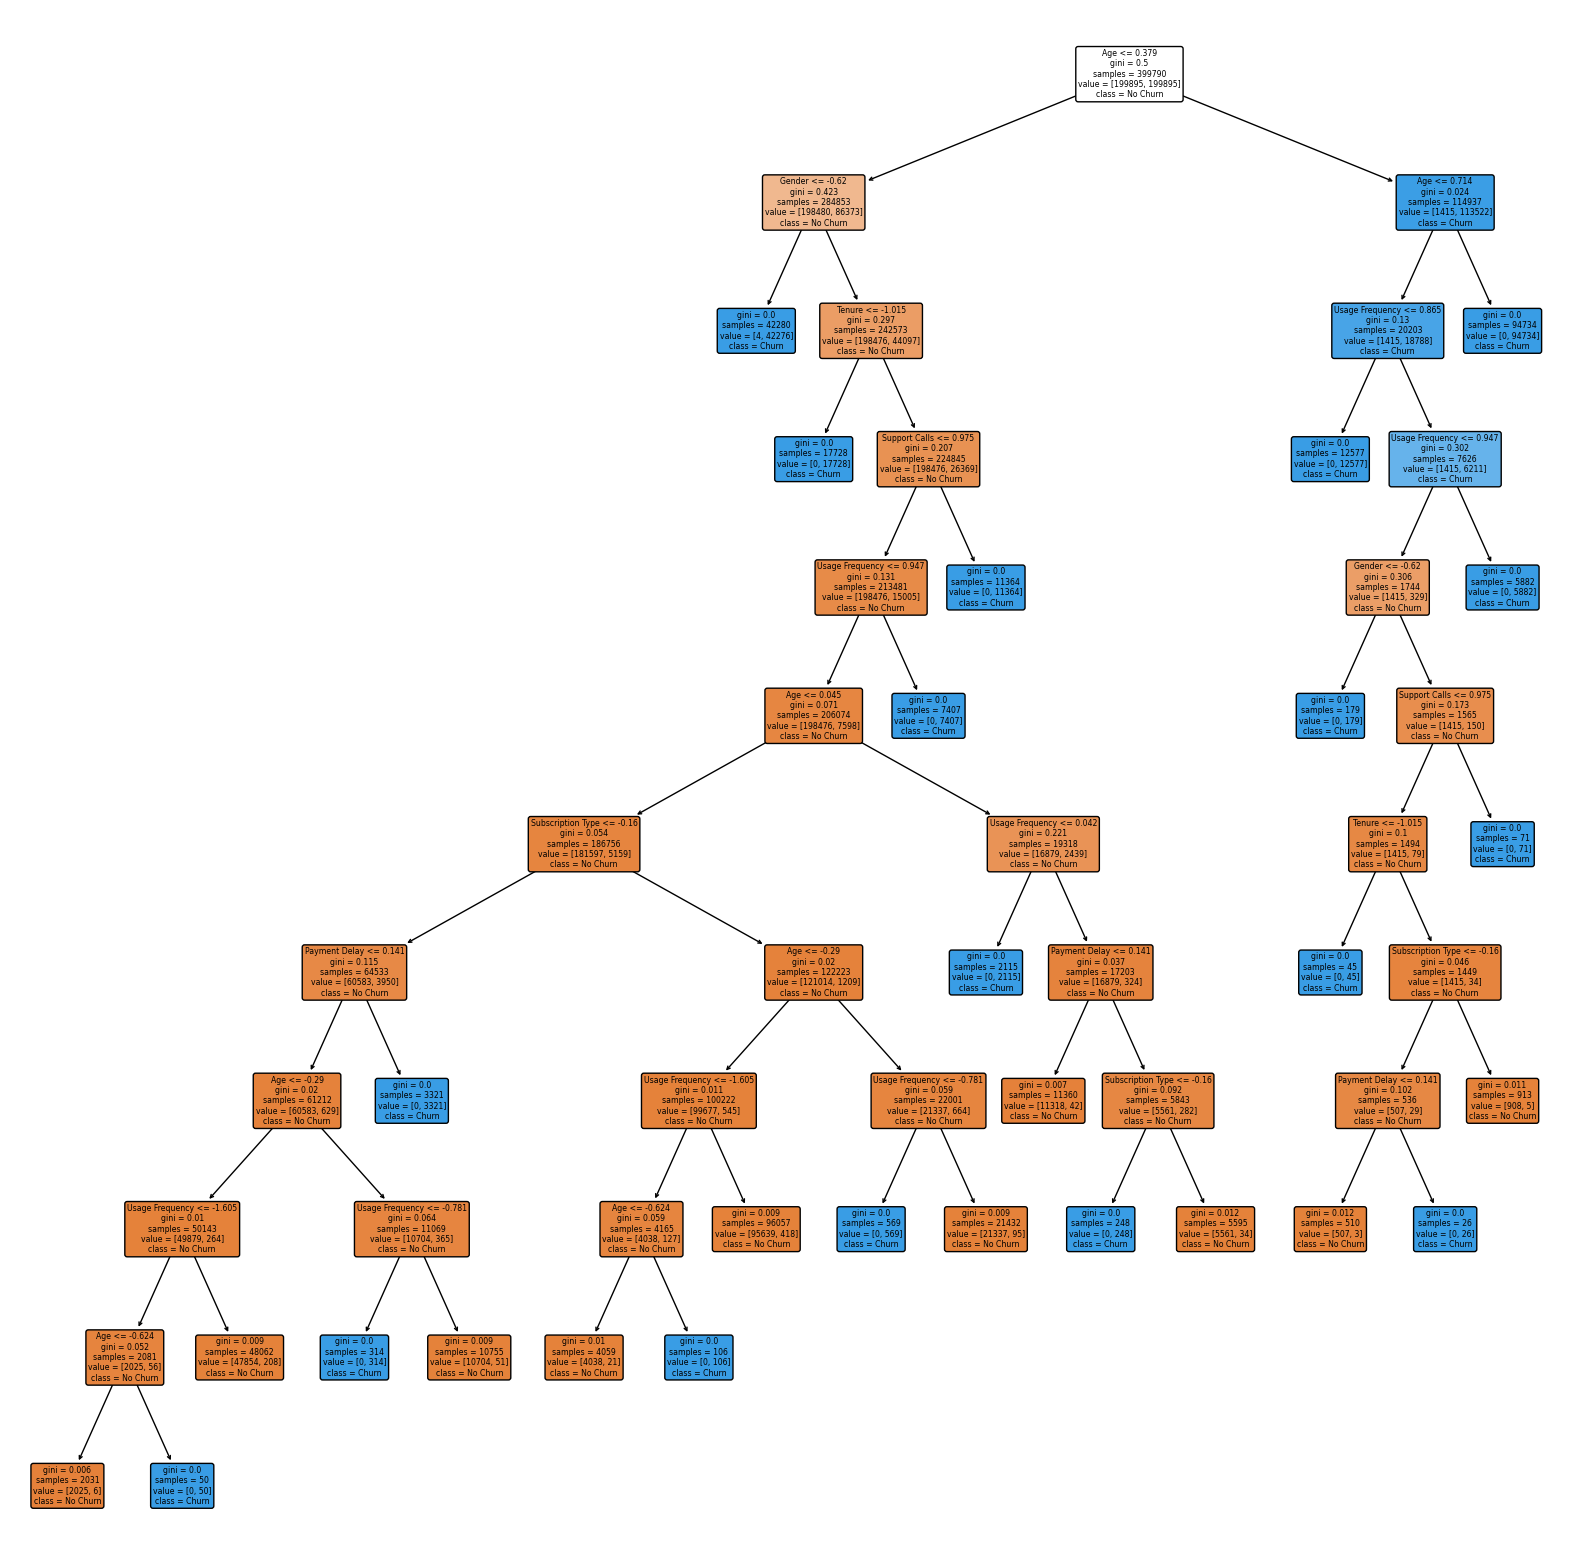

In [50]:
plt.figure(figsize=(20, 20))
tree.plot_tree(model, filled=True, rounded=True, class_names=['No Churn', 'Churn'], feature_names=X_train.columns)
plt.savefig('decision_tree_best.png', bbox_inches='tight', pad_inches=0.5)
plt.show()